
Generate answer:
<img src='images/generated_ans3.jpg'>

/home/shinelink/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/shinelink/test/doc/dictionary/RelationNet/Relation-Network-Tensorflow-master/vqa_util.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/shinelink/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/shinelink/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/shinelink/anaco

FileCnt> 10
FileCnt> 20
FileCnt> 30
FileCnt> 40
FileCnt> 50
FileCnt> 60
FileCnt> 70
FileCnt> 80
FileCnt> 90
FileCnt> 100
FileCnt> 110
FileCnt> 120
FileCnt> 130
FileCnt> 140
FileCnt> 150
FileCnt> 160
FileCnt> 170
FileCnt> 180
FileCnt> 190
FileCnt> 200
FileCnt> 210
FileCnt> 220
FileCnt> 230
FileCnt> 240
FileCnt> 250
FileCnt> 260
FileCnt> 270
FileCnt> 280
FileCnt> 290
FileCnt> 300
FileCnt> 310
FileCnt> 320
FileCnt> 330
FileCnt> 340
FileCnt> 350
FileCnt> 360
FileCnt> 370
FileCnt> 380
FileCnt> 390
FileCnt> 400
FileCnt> 410
FileCnt> 420
FileCnt> 430
FileCnt> 440
FileCnt> 450
FileCnt> 460
FileCnt> 470
FileCnt> 480
FileCnt> 490
FileCnt> 500
FileCnt> 510
FileCnt> 520
FileCnt> 530
FileCnt> 540
FileCnt> 550
FileCnt> 560
FileCnt> 570
FileCnt> 580
FileCnt> 590
FileCnt> 600
FileCnt> 610
FileCnt> 620


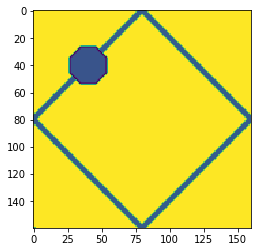

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import h5py
import numpy as np
from PIL import Image, ImageDraw
import matplotlib

import matplotlib.pyplot as plt
import os


from vqa_util import *


class Representation:
    def __init__(self, correct_ans_idx, relation_structure_encoded, relation_structure):
        self.correct_ans_idx = correct_ans_idx
        self.relation_structure_encoded = relation_structure_encoded
        self.relation_structure = relation_structure
        
def generator(sourcepath, targetpath, dataset_size, img_size):
    
    def getSourceFileName(sourcepath, FileCnt):
        
        for i in range(1000):
            strFileName = 'PGM_neutral_train_' + str(FileCnt) + '.npz'                      
            sourceFullPath = os.path.join(sourcepath, strFileName)
            FileCnt += 1
            if os.path.exists(sourceFullPath): break
                
        return sourceFullPath, FileCnt
    
    def npz_to_hy_convertor(sourceFullPath, FileCnt):
        
        data = np.load(sourceFullPath)
        #
        reshaped_img = data['image'].reshape(16, 160, 160) 
        correct_ans_idx, relation_structure_encoded, relation_structure = np.asscalar(data['target']), data['relation_structure_encoded'], data['relation_structure']
        rep = Representation(correct_ans_idx, relation_structure_encoded, relation_structure)                 
                 
        return reshaped_img, rep        
 
    # output files
    f = h5py.File(os.path.join(targetpath, 'data.hy'), 'w')
    f_info = h5py.File(os.path.join(targetpath, 'info.hy'), 'w')
    id_file = open(os.path.join(targetpath, 'id.txt'), 'w')


    count = 0
    FileCnt = 0
    while(1):

        sourceFullPath, FileCnt = getSourceFileName(sourcepath, FileCnt)
        I, R = npz_to_hy_convertor(sourceFullPath, FileCnt)
        
        '''
        I is (128, 128, 3) image of [[180 180 150]..
        A is (20,10) of True and false
        Q is a (20,11) of True and False        
        
        Each image will have 20 id to cover all shapes and questions: NUM_SHAPE*NUM_Q
        
        For each image, there's 4 shapes and 5 question @; 
        since count +=1, so each image will create 20 individual id
        so I guess data_size should be at least 20 to cover all id for just a single image.                
        '''
        if FileCnt % 10 == 0:
            print('FileCnt>',FileCnt)
        
        for j in range(NUM_MC):            
            id = '{}'.format(count)
            id_file.write(id+'\n')
            
            # shape of images> (160, 160, 16)
            grp = f.create_group(id)
            grp['context0'] = I[0]
            grp['context1'] = I[1]
            grp['context2'] = I[2]
            grp['context3'] = I[3]                 
            grp['context4'] = I[4]
            grp['context5'] = I[5]
            grp['context6'] = I[6]
            grp['context7'] = I[7]       
            grp['mc'] = I[NUM_CONTEXT + j]            
            grp['answer'] = 1 if (j== R.correct_ans_idx) else 0
            
            '''
            Save info. This part is separated out from the training/testing data
                    
            relation_structure_encoded [[0 1 0 0 0 0 1 0 0 0 0 1]
                 [0 0 0 0 0 0 0 0 0 0 0 0]
                 [0 0 0 0 0 0 0 0 0 0 0 0]
                 [0 0 0 0 0 0 0 0 0 0 0 0]]            
            
            relation_structure: [[b'line' b'type' b'consistent_union']]
            '''
            
            grp_info = f_info.create_group(id)            
            grp_info['relation_structure_encoded'] = R.relation_structure_encoded
            grp_info['relation_structure'] = R.relation_structure_encoded           
            
                            
            # >count --> for progress bar
            count += 1

            if count >= dataset_size:                
                f.close()
                f_info.close()
                id_file.close()
                return I
            
def check_path(path):
    if not os.path.exists(path):
        os.mkdir(path)

''' 
*************************************
Main area

if dataset_size = 5000
it create id = 0 - 4999
data.hy = 9.2GB; info.hy = 4MB
FileCnt = 620 no. of files

*************************************
'''
# python generator.py --dir_name 'data_test' --dataset_size 10
dir_name ='data_hy'
dataset_size = 5000
# the program at least create 0 - 4999 ID
img_size = 160

# source data = np.load("../ravens-matrices/neutral/PGM_neutral_train_2.npz")
sourcepath = "../ravens-matrices/neutral/"

# TargetPath
basepath = './datasets'
check_path(basepath)


dir_name = 'data_hy'
targetpath = os.path.join(basepath, dir_name)
check_path(targetpath)

I = generator(sourcepath, targetpath, dataset_size, img_size)

# Display image
fig = plt.figure()
plt.imshow(I[0])            
plt.show()

